In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F # actvs no params 
from torch.utils.data import DataLoader
import torchvision.datasets as datasets
import torchvision.transforms as transforms

import matplotlib.pyplot as plt

In [18]:
class NN(nn.Module):
    def __init__(self, input_size, num_classes):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(input_size, 50)
        self.fc2 = nn.Linear(50, num_classes)
        
    def forward(self, x):
        
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        
        return x  

class CNN(nn.Module):
    def __init__(self, in_channels=1, num_classes=10):
        super(CNN, self).__init__()
        
        # Same #
        self.conv1 = nn.Conv2d(in_channels=in_channels, 
                               out_channels=8, 
                               kernel_size=(3,3), 
                               stride=(1,1), 
                               padding=(1,1))
        # 14x14
        self.pool = nn.MaxPool2d(kernel_size=(2,2), 
                                stride=(2,2))
    
        # Same #
        self.conv2 = nn.Conv2d(in_channels=8, 
                               out_channels=16, 
                               kernel_size=(3,3), 
                               stride=(1,1), 
                               padding=(1,1))
        
        self.fc1 = nn.Linear(16 * 7 * 7, num_classes)
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = x.reshape(x.shape[0], -1)
        x = self.fc1(x)
        
        return x 
        

torch.Size([64, 1, 28, 28])
tensor([8, 3, 2, 2, 4, 5, 8, 7, 9, 8, 0, 9, 7, 4, 0, 3, 2, 8, 8, 8, 4, 3, 7, 2,
        5, 2, 6, 1, 1, 9, 0, 4, 4, 2, 0, 9, 8, 1, 7, 9, 2, 3, 7, 8, 7, 8, 0, 8,
        9, 8, 3, 4, 6, 2, 5, 2, 0, 4, 3, 0, 3, 5, 3, 8], device='cuda:0')
torch.Size([64, 1, 28, 28])
tensor([1, 9, 9, 1, 7, 9, 2, 2, 3, 7, 2, 4, 5, 1, 6, 0, 6, 8, 3, 4, 3, 7, 7, 2,
        2, 5, 3, 4, 8, 6, 9, 1, 6, 6, 8, 3, 1, 1, 1, 1, 2, 6, 3, 0, 9, 4, 0, 7,
        2, 3, 3, 2, 9, 2, 1, 6, 0, 6, 8, 3, 0, 6, 5, 8], device='cuda:0')
torch.Size([64, 1, 28, 28])
tensor([2, 0, 9, 8, 2, 0, 6, 9, 1, 8, 3, 9, 2, 4, 8, 0, 2, 4, 5, 1, 0, 1, 4, 9,
        5, 2, 0, 5, 2, 5, 3, 1, 0, 9, 0, 8, 3, 6, 9, 0, 7, 8, 3, 7, 3, 4, 1, 2,
        0, 9, 3, 2, 9, 3, 7, 4, 6, 5, 7, 6, 0, 5, 9, 2], device='cuda:0')
torch.Size([64, 1, 28, 28])
tensor([6, 5, 6, 2, 5, 2, 9, 0, 4, 9, 1, 8, 4, 7, 6, 4, 2, 4, 9, 8, 9, 2, 3, 1,
        9, 3, 8, 7, 4, 3, 0, 7, 8, 6, 9, 3, 5, 2, 6, 1, 8, 1, 4, 5, 1, 1, 6, 5,
        6, 4, 8, 0, 9, 2, 

torch.Size([64, 1, 28, 28])
tensor([5, 7, 9, 9, 7, 1, 8, 9, 2, 9, 8, 5, 6, 1, 1, 6, 9, 5, 2, 7, 9, 0, 4, 7,
        4, 5, 7, 0, 6, 8, 4, 0, 4, 0, 1, 7, 3, 0, 5, 2, 1, 7, 7, 8, 3, 5, 8, 9,
        2, 3, 0, 4, 7, 2, 1, 5, 9, 0, 3, 1, 9, 6, 6, 4], device='cuda:0')
torch.Size([64, 1, 28, 28])
tensor([9, 0, 0, 3, 8, 1, 0, 8, 2, 0, 4, 0, 9, 6, 6, 3, 5, 3, 4, 8, 4, 7, 3, 6,
        8, 3, 0, 8, 7, 9, 4, 5, 9, 1, 3, 0, 9, 4, 0, 1, 0, 8, 2, 7, 0, 3, 8, 2,
        1, 4, 6, 4, 7, 1, 0, 0, 4, 1, 0, 7, 4, 0, 4, 9], device='cuda:0')
torch.Size([64, 1, 28, 28])
tensor([6, 2, 5, 7, 3, 0, 8, 5, 8, 7, 9, 2, 5, 3, 6, 4, 5, 7, 4, 4, 2, 9, 7, 2,
        4, 9, 4, 7, 9, 0, 6, 3, 6, 1, 4, 1, 8, 2, 9, 6, 3, 3, 9, 8, 3, 4, 0, 4,
        2, 9, 2, 9, 2, 7, 4, 3, 0, 0, 7, 6, 9, 9, 2, 8], device='cuda:0')
torch.Size([64, 1, 28, 28])
tensor([5, 5, 0, 1, 2, 7, 1, 5, 9, 9, 3, 8, 5, 0, 4, 8, 6, 6, 9, 0, 5, 6, 0, 0,
        9, 0, 9, 8, 5, 8, 0, 7, 1, 7, 3, 2, 1, 1, 8, 1, 2, 0, 8, 0, 3, 6, 9, 1,
        8, 5, 7, 8, 8, 0, 

torch.Size([64, 1, 28, 28])
tensor([8, 8, 0, 8, 0, 2, 4, 4, 1, 7, 3, 1, 5, 3, 5, 1, 5, 4, 6, 5, 5, 9, 7, 1,
        6, 4, 8, 2, 3, 5, 2, 0, 0, 4, 3, 9, 6, 4, 1, 3, 0, 5, 1, 9, 1, 0, 2, 2,
        9, 2, 3, 3, 4, 6, 1, 4, 0, 1, 8, 1, 0, 3, 1, 5], device='cuda:0')
torch.Size([64, 1, 28, 28])
tensor([7, 6, 1, 1, 9, 7, 3, 3, 1, 9, 9, 3, 5, 4, 1, 5, 4, 1, 1, 6, 5, 3, 5, 3,
        9, 9, 7, 0, 1, 6, 5, 9, 7, 1, 2, 0, 7, 5, 6, 3, 2, 8, 6, 4, 6, 6, 2, 7,
        1, 3, 5, 9, 5, 4, 3, 7, 4, 9, 6, 3, 7, 7, 9, 1], device='cuda:0')
torch.Size([64, 1, 28, 28])
tensor([1, 0, 0, 7, 2, 6, 7, 2, 7, 8, 7, 7, 2, 1, 1, 7, 1, 2, 7, 1, 2, 6, 9, 3,
        9, 0, 5, 3, 5, 6, 4, 0, 8, 7, 2, 8, 3, 8, 5, 3, 4, 5, 4, 6, 3, 3, 0, 8,
        3, 6, 9, 4, 9, 3, 0, 6, 4, 4, 1, 6, 1, 9, 3, 9], device='cuda:0')
torch.Size([64, 1, 28, 28])
tensor([9, 8, 2, 2, 8, 4, 9, 1, 7, 2, 7, 1, 9, 8, 5, 8, 3, 1, 3, 3, 0, 1, 4, 6,
        1, 5, 2, 1, 6, 6, 3, 2, 9, 9, 1, 4, 1, 8, 4, 7, 0, 5, 1, 3, 5, 4, 3, 6,
        9, 6, 6, 0, 9, 4, 

torch.Size([64, 1, 28, 28])
tensor([4, 8, 9, 6, 8, 7, 4, 2, 7, 1, 4, 2, 1, 8, 0, 7, 2, 7, 6, 8, 1, 2, 0, 1,
        7, 3, 6, 5, 1, 7, 9, 1, 2, 5, 5, 0, 1, 5, 5, 5, 1, 5, 9, 9, 1, 4, 9, 3,
        7, 2, 4, 9, 3, 3, 1, 5, 2, 4, 4, 9, 5, 1, 9, 7], device='cuda:0')
torch.Size([64, 1, 28, 28])
tensor([0, 9, 1, 1, 4, 9, 9, 6, 4, 6, 9, 8, 6, 4, 9, 2, 4, 5, 1, 2, 1, 9, 4, 7,
        4, 9, 9, 3, 4, 9, 1, 4, 4, 0, 4, 7, 4, 0, 4, 5, 1, 3, 2, 4, 8, 4, 6, 0,
        4, 3, 3, 2, 4, 4, 7, 5, 8, 9, 8, 7, 3, 9, 5, 7], device='cuda:0')
torch.Size([64, 1, 28, 28])
tensor([4, 8, 2, 2, 7, 5, 8, 3, 4, 9, 3, 0, 7, 5, 1, 2, 8, 7, 8, 8, 3, 2, 3, 1,
        6, 0, 1, 9, 9, 8, 0, 5, 5, 3, 7, 1, 4, 8, 1, 7, 9, 9, 7, 7, 5, 0, 1, 1,
        9, 5, 9, 6, 1, 6, 0, 3, 4, 4, 8, 2, 3, 9, 8, 4], device='cuda:0')
torch.Size([64, 1, 28, 28])
tensor([5, 2, 0, 7, 9, 6, 7, 4, 7, 7, 5, 4, 7, 5, 1, 3, 7, 7, 1, 3, 3, 3, 6, 5,
        0, 6, 9, 9, 6, 4, 1, 3, 2, 2, 4, 1, 4, 5, 0, 6, 0, 2, 5, 4, 5, 3, 3, 0,
        0, 8, 9, 1, 2, 3, 

torch.Size([64, 1, 28, 28])
tensor([7, 2, 1, 0, 9, 3, 1, 9, 1, 5, 3, 5, 7, 1, 1, 0, 2, 0, 0, 8, 4, 3, 7, 8,
        6, 3, 4, 0, 8, 0, 8, 0, 0, 6, 7, 5, 8, 3, 4, 4, 7, 4, 9, 6, 8, 1, 8, 6,
        3, 8, 8, 4, 2, 5, 5, 8, 4, 5, 8, 5, 0, 5, 4, 9], device='cuda:0')
torch.Size([64, 1, 28, 28])
tensor([5, 3, 6, 0, 0, 1, 1, 4, 9, 6, 9, 2, 4, 9, 7, 6, 0, 1, 7, 0, 5, 3, 0, 7,
        7, 2, 6, 4, 4, 3, 5, 6, 8, 3, 9, 6, 3, 6, 3, 3, 9, 7, 9, 6, 1, 1, 2, 6,
        3, 5, 9, 8, 3, 2, 9, 0, 1, 5, 7, 6, 4, 0, 8, 3], device='cuda:0')
torch.Size([64, 1, 28, 28])
tensor([9, 8, 3, 8, 7, 9, 7, 9, 6, 1, 6, 0, 6, 3, 7, 0, 6, 5, 2, 4, 4, 6, 6, 9,
        2, 8, 9, 4, 2, 9, 6, 7, 4, 9, 1, 3, 7, 1, 9, 6, 5, 1, 5, 6, 1, 5, 7, 3,
        3, 9, 4, 1, 5, 5, 2, 8, 1, 6, 8, 1, 9, 0, 3, 2], device='cuda:0')
torch.Size([64, 1, 28, 28])
tensor([9, 6, 1, 8, 1, 5, 2, 8, 1, 8, 5, 1, 9, 0, 1, 0, 0, 6, 0, 1, 9, 2, 4, 3,
        7, 0, 1, 3, 2, 1, 8, 3, 3, 8, 7, 0, 7, 7, 4, 8, 3, 5, 0, 3, 8, 9, 3, 2,
        9, 9, 9, 3, 7, 1, 

torch.Size([64, 1, 28, 28])
tensor([7, 3, 1, 0, 0, 4, 1, 8, 0, 5, 5, 0, 7, 7, 7, 9, 5, 2, 4, 1, 3, 1, 6, 9,
        6, 0, 7, 7, 4, 5, 7, 0, 0, 5, 1, 7, 8, 6, 7, 8, 8, 9, 7, 1, 7, 3, 4, 7,
        3, 1, 0, 3, 2, 5, 8, 6, 4, 7, 3, 3, 1, 6, 6, 8], device='cuda:0')
torch.Size([64, 1, 28, 28])
tensor([8, 2, 2, 6, 8, 6, 3, 7, 6, 5, 4, 0, 7, 8, 9, 7, 2, 7, 7, 2, 7, 7, 6, 1,
        6, 3, 4, 1, 9, 4, 5, 0, 0, 5, 4, 9, 1, 3, 9, 8, 1, 5, 6, 5, 3, 6, 6, 1,
        1, 9, 2, 7, 0, 3, 4, 1, 4, 1, 0, 5, 5, 4, 5, 0], device='cuda:0')
torch.Size([64, 1, 28, 28])
tensor([1, 2, 7, 7, 3, 7, 1, 3, 1, 8, 3, 1, 0, 6, 6, 0, 9, 2, 5, 7, 5, 2, 4, 2,
        2, 8, 6, 8, 7, 2, 5, 4, 0, 6, 0, 9, 2, 8, 3, 9, 9, 6, 3, 9, 5, 5, 3, 8,
        8, 5, 2, 8, 3, 7, 8, 5, 2, 5, 4, 9, 7, 3, 3, 0], device='cuda:0')
torch.Size([64, 1, 28, 28])
tensor([4, 2, 2, 5, 9, 2, 3, 2, 3, 5, 7, 3, 0, 1, 3, 6, 1, 9, 8, 3, 3, 0, 9, 1,
        1, 4, 8, 5, 4, 6, 4, 4, 0, 5, 4, 2, 0, 8, 2, 4, 0, 4, 1, 0, 0, 9, 0, 2,
        1, 8, 0, 8, 8, 3, 

torch.Size([64, 1, 28, 28])
tensor([6, 8, 5, 5, 6, 9, 1, 1, 9, 1, 6, 6, 6, 5, 8, 8, 3, 1, 2, 4, 1, 9, 1, 3,
        9, 1, 7, 0, 0, 8, 1, 1, 9, 8, 0, 5, 4, 9, 3, 5, 6, 7, 2, 4, 3, 3, 2, 1,
        6, 5, 7, 6, 4, 3, 0, 4, 9, 5, 8, 7, 2, 8, 6, 8], device='cuda:0')
torch.Size([64, 1, 28, 28])
tensor([5, 5, 0, 9, 4, 3, 3, 3, 8, 7, 9, 5, 2, 8, 2, 1, 6, 1, 0, 9, 4, 8, 6, 1,
        4, 9, 6, 7, 6, 6, 2, 3, 1, 0, 5, 2, 9, 1, 9, 6, 3, 2, 9, 7, 7, 3, 1, 1,
        1, 3, 3, 0, 8, 9, 0, 5, 5, 7, 1, 5, 5, 2, 9, 1], device='cuda:0')
torch.Size([64, 1, 28, 28])
tensor([4, 9, 9, 8, 9, 4, 3, 1, 3, 2, 1, 3, 0, 0, 5, 0, 3, 6, 1, 6, 5, 2, 7, 6,
        6, 6, 9, 1, 7, 3, 8, 3, 9, 9, 0, 4, 6, 5, 8, 1, 6, 5, 1, 8, 5, 5, 4, 0,
        5, 4, 3, 4, 6, 6, 0, 8, 0, 4, 2, 8, 4, 0, 6, 5], device='cuda:0')
torch.Size([64, 1, 28, 28])
tensor([9, 1, 8, 8, 3, 2, 5, 1, 0, 6, 4, 7, 7, 1, 2, 4, 7, 2, 7, 0, 0, 6, 0, 4,
        1, 1, 7, 9, 0, 3, 6, 9, 3, 1, 6, 0, 1, 6, 5, 1, 7, 6, 3, 3, 7, 5, 1, 2,
        4, 0, 9, 2, 7, 7, 

torch.Size([64, 1, 28, 28])
tensor([6, 0, 6, 5, 3, 1, 9, 6, 3, 6, 7, 1, 2, 0, 9, 0, 8, 1, 4, 7, 7, 7, 6, 8,
        5, 4, 3, 1, 5, 2, 3, 3, 7, 1, 7, 3, 3, 7, 1, 8, 7, 7, 8, 0, 5, 6, 7, 9,
        1, 6, 7, 7, 4, 1, 4, 5, 7, 4, 6, 4, 0, 6, 0, 1], device='cuda:0')
torch.Size([64, 1, 28, 28])
tensor([8, 6, 9, 0, 3, 4, 7, 9, 4, 6, 3, 6, 0, 3, 2, 0, 7, 7, 6, 3, 7, 1, 9, 3,
        9, 5, 6, 8, 8, 2, 6, 2, 6, 9, 7, 4, 0, 4, 3, 1, 0, 3, 5, 7, 0, 2, 9, 5,
        4, 9, 8, 8, 0, 3, 0, 7, 4, 2, 5, 5, 6, 6, 4, 8], device='cuda:0')
torch.Size([64, 1, 28, 28])
tensor([6, 8, 7, 4, 1, 0, 1, 7, 2, 0, 3, 7, 3, 6, 8, 8, 7, 8, 0, 0, 7, 3, 3, 7,
        8, 2, 7, 3, 1, 0, 5, 7, 9, 0, 8, 1, 3, 8, 5, 5, 2, 2, 0, 5, 4, 5, 7, 8,
        9, 4, 9, 8, 8, 4, 9, 8, 7, 5, 8, 9, 3, 1, 6, 7], device='cuda:0')
torch.Size([64, 1, 28, 28])
tensor([9, 3, 4, 4, 7, 3, 8, 4, 3, 5, 4, 5, 0, 6, 6, 0, 1, 0, 0, 2, 5, 0, 2, 5,
        5, 4, 4, 7, 1, 6, 8, 9, 2, 7, 4, 9, 4, 0, 8, 9, 1, 8, 1, 1, 7, 5, 4, 3,
        3, 8, 5, 3, 8, 5, 

torch.Size([64, 1, 28, 28])
tensor([2, 4, 0, 9, 9, 9, 7, 6, 7, 1, 8, 4, 3, 9, 4, 2, 0, 1, 1, 8, 7, 3, 4, 9,
        7, 2, 6, 5, 5, 1, 3, 9, 4, 3, 8, 6, 8, 4, 3, 3, 9, 6, 6, 5, 5, 7, 1, 8,
        2, 6, 2, 9, 1, 4, 6, 0, 4, 9, 9, 6, 9, 4, 4, 0], device='cuda:0')
torch.Size([64, 1, 28, 28])
tensor([5, 8, 1, 1, 3, 1, 5, 8, 2, 1, 1, 5, 7, 7, 3, 6, 4, 2, 1, 3, 6, 6, 6, 8,
        7, 6, 8, 8, 7, 5, 7, 0, 5, 1, 8, 6, 4, 9, 9, 2, 4, 6, 3, 3, 6, 8, 0, 6,
        2, 0, 0, 4, 5, 2, 1, 8, 6, 3, 6, 8, 0, 9, 4, 5], device='cuda:0')
torch.Size([64, 1, 28, 28])
tensor([2, 5, 3, 4, 7, 1, 8, 9, 5, 0, 1, 3, 0, 1, 5, 5, 4, 4, 7, 4, 9, 0, 0, 1,
        8, 1, 6, 5, 3, 5, 6, 9, 0, 4, 1, 3, 3, 9, 1, 5, 3, 2, 3, 3, 8, 6, 9, 8,
        9, 3, 7, 1, 1, 7, 5, 6, 2, 3, 0, 2, 5, 8, 8, 2], device='cuda:0')
torch.Size([64, 1, 28, 28])
tensor([8, 9, 2, 3, 5, 3, 3, 6, 3, 1, 7, 9, 5, 4, 7, 1, 2, 1, 2, 3, 9, 9, 6, 2,
        2, 8, 1, 1, 6, 3, 7, 4, 8, 7, 9, 0, 9, 1, 5, 5, 9, 0, 2, 1, 0, 5, 1, 6,
        3, 5, 8, 1, 0, 8, 

torch.Size([64, 1, 28, 28])
tensor([0, 2, 5, 9, 1, 5, 7, 5, 7, 2, 6, 8, 3, 6, 8, 7, 1, 0, 2, 5, 6, 8, 6, 4,
        2, 1, 2, 3, 7, 5, 4, 9, 7, 8, 6, 6, 9, 1, 8, 5, 9, 1, 9, 9, 8, 0, 1, 3,
        7, 4, 4, 4, 3, 7, 7, 8, 0, 5, 1, 9, 7, 2, 6, 1], device='cuda:0')
torch.Size([64, 1, 28, 28])
tensor([6, 2, 7, 8, 0, 0, 7, 0, 2, 3, 3, 8, 8, 3, 0, 2, 4, 6, 7, 6, 5, 0, 4, 4,
        7, 0, 5, 2, 2, 8, 5, 2, 3, 0, 3, 5, 6, 6, 2, 2, 2, 6, 6, 2, 3, 3, 2, 7,
        5, 0, 1, 1, 6, 1, 3, 7, 8, 0, 3, 7, 5, 5, 2, 7], device='cuda:0')
torch.Size([64, 1, 28, 28])
tensor([9, 6, 4, 2, 6, 6, 0, 3, 4, 3, 4, 6, 7, 3, 4, 7, 2, 6, 7, 8, 3, 6, 5, 2,
        6, 2, 5, 9, 2, 3, 2, 7, 8, 0, 8, 7, 4, 7, 5, 4, 1, 4, 0, 8, 2, 0, 5, 0,
        4, 6, 0, 3, 8, 8, 3, 6, 4, 7, 4, 7, 7, 3, 1, 8], device='cuda:0')
torch.Size([64, 1, 28, 28])
tensor([0, 4, 8, 6, 6, 7, 2, 7, 1, 0, 7, 1, 6, 1, 4, 0, 6, 2, 5, 1, 4, 0, 1, 2,
        1, 8, 3, 9, 2, 5, 4, 6, 2, 4, 8, 1, 6, 4, 7, 3, 7, 9, 5, 1, 5, 9, 6, 5,
        7, 8, 7, 4, 5, 3, 

torch.Size([64, 1, 28, 28])
tensor([3, 4, 7, 3, 5, 3, 9, 9, 6, 8, 1, 0, 8, 9, 8, 5, 3, 1, 2, 3, 1, 0, 6, 3,
        2, 9, 7, 5, 4, 5, 7, 1, 6, 1, 6, 7, 5, 1, 0, 9, 0, 4, 3, 1, 7, 6, 8, 6,
        0, 6, 9, 3, 8, 1, 9, 9, 6, 6, 3, 7, 6, 4, 8, 6], device='cuda:0')
torch.Size([64, 1, 28, 28])
tensor([8, 7, 4, 8, 9, 9, 3, 7, 9, 3, 8, 9, 1, 0, 4, 6, 0, 5, 6, 5, 6, 2, 4, 8,
        1, 2, 2, 3, 4, 1, 7, 4, 8, 0, 9, 3, 4, 2, 0, 6, 3, 1, 2, 4, 2, 2, 7, 4,
        8, 6, 1, 7, 1, 2, 4, 0, 1, 3, 4, 5, 3, 6, 2, 7], device='cuda:0')
torch.Size([64, 1, 28, 28])
tensor([5, 1, 3, 1, 7, 6, 1, 6, 5, 1, 2, 8, 2, 5, 7, 9, 3, 0, 5, 9, 6, 1, 3, 8,
        5, 2, 6, 5, 4, 6, 3, 1, 4, 3, 6, 1, 9, 7, 8, 4, 3, 8, 8, 4, 0, 2, 9, 7,
        4, 1, 4, 3, 0, 1, 4, 2, 2, 8, 0, 0, 8, 7, 7, 4], device='cuda:0')
torch.Size([64, 1, 28, 28])
tensor([0, 3, 6, 5, 9, 6, 8, 0, 5, 1, 6, 0, 6, 7, 3, 0, 6, 5, 0, 7, 2, 2, 5, 3,
        9, 4, 2, 7, 1, 9, 9, 4, 6, 1, 7, 7, 0, 7, 0, 6, 3, 4, 3, 1, 4, 5, 1, 6,
        3, 1, 6, 2, 7, 9, 

torch.Size([64, 1, 28, 28])
tensor([7, 9, 7, 5, 5, 0, 2, 8, 4, 3, 3, 2, 1, 5, 7, 4, 4, 2, 1, 3, 1, 9, 2, 4,
        3, 9, 3, 0, 0, 6, 5, 2, 0, 3, 7, 8, 5, 2, 3, 0, 1, 0, 3, 2, 3, 5, 7, 4,
        7, 0, 8, 5, 6, 5, 0, 6, 6, 7, 5, 9, 1, 2, 1, 2], device='cuda:0')
torch.Size([64, 1, 28, 28])
tensor([4, 4, 9, 4, 3, 9, 5, 6, 4, 2, 9, 4, 6, 2, 2, 7, 8, 0, 2, 0, 9, 7, 3, 2,
        2, 0, 5, 4, 5, 8, 4, 5, 0, 3, 0, 1, 5, 4, 7, 7, 6, 5, 9, 8, 7, 3, 6, 0,
        1, 0, 3, 7, 3, 7, 1, 5, 7, 0, 5, 0, 8, 1, 3, 5], device='cuda:0')
torch.Size([64, 1, 28, 28])
tensor([7, 5, 1, 0, 2, 7, 4, 2, 7, 9, 9, 8, 5, 3, 7, 2, 7, 6, 4, 2, 4, 4, 1, 1,
        5, 2, 6, 5, 7, 3, 9, 7, 9, 0, 7, 1, 7, 7, 2, 0, 9, 5, 8, 9, 9, 1, 7, 4,
        2, 4, 1, 7, 3, 0, 0, 9, 4, 0, 2, 9, 5, 3, 8, 8], device='cuda:0')
torch.Size([64, 1, 28, 28])
tensor([7, 2, 1, 8, 9, 2, 3, 6, 1, 6, 3, 3, 9, 6, 0, 9, 4, 3, 9, 6, 9, 7, 4, 5,
        0, 7, 7, 2, 8, 1, 2, 9, 2, 2, 1, 8, 9, 5, 7, 8, 7, 3, 6, 9, 6, 9, 4, 5,
        5, 6, 7, 9, 6, 6, 

torch.Size([64, 1, 28, 28])
tensor([0, 8, 5, 5, 7, 2, 7, 0, 3, 3, 2, 8, 7, 4, 1, 5, 7, 7, 9, 6, 4, 8, 9, 1,
        4, 0, 1, 1, 1, 8, 0, 2, 1, 1, 7, 4, 2, 8, 4, 0, 0, 9, 7, 9, 1, 9, 1, 7,
        4, 3, 3, 7, 0, 4, 2, 9, 7, 5, 0, 2, 1, 5, 2, 7], device='cuda:0')
torch.Size([64, 1, 28, 28])
tensor([9, 5, 5, 0, 9, 8, 8, 3, 7, 2, 9, 0, 5, 4, 7, 4, 2, 2, 8, 5, 7, 7, 0, 0,
        0, 7, 9, 7, 7, 2, 1, 0, 3, 8, 2, 6, 1, 6, 9, 7, 1, 1, 8, 3, 8, 6, 4, 7,
        9, 8, 6, 3, 4, 7, 1, 3, 5, 4, 1, 2, 7, 2, 2, 8], device='cuda:0')
torch.Size([64, 1, 28, 28])
tensor([9, 8, 8, 8, 7, 6, 1, 5, 7, 4, 4, 9, 4, 5, 3, 8, 4, 2, 3, 0, 2, 8, 7, 5,
        0, 7, 8, 4, 0, 7, 6, 8, 2, 6, 4, 0, 3, 9, 9, 1, 0, 2, 1, 1, 3, 3, 7, 6,
        6, 3, 4, 3, 7, 7, 5, 2, 0, 4, 9, 3, 8, 6, 2, 3], device='cuda:0')
torch.Size([64, 1, 28, 28])
tensor([3, 8, 4, 4, 3, 0, 2, 6, 3, 4, 5, 5, 3, 4, 5, 2, 7, 3, 9, 8, 2, 5, 2, 2,
        9, 6, 8, 2, 2, 5, 9, 4, 7, 0, 5, 5, 2, 0, 6, 6, 0, 1, 9, 0, 4, 8, 6, 1,
        7, 6, 1, 0, 1, 8, 

torch.Size([64, 1, 28, 28])
tensor([9, 2, 6, 8, 9, 9, 2, 6, 8, 9, 7, 4, 8, 6, 7, 3, 4, 7, 6, 1, 6, 2, 1, 5,
        5, 2, 5, 3, 4, 9, 6, 6, 2, 0, 8, 4, 8, 9, 0, 9, 5, 5, 3, 2, 6, 7, 4, 3,
        8, 7, 0, 9, 1, 9, 0, 4, 9, 8, 5, 4, 1, 7, 1, 2], device='cuda:0')
torch.Size([64, 1, 28, 28])
tensor([6, 9, 1, 4, 2, 2, 7, 4, 3, 2, 9, 6, 5, 5, 5, 0, 9, 9, 1, 1, 8, 8, 4, 1,
        1, 9, 9, 1, 9, 7, 5, 5, 0, 2, 3, 4, 2, 9, 3, 1, 8, 4, 4, 3, 1, 4, 1, 8,
        1, 7, 6, 1, 4, 5, 5, 4, 0, 1, 1, 2, 7, 4, 0, 8], device='cuda:0')
torch.Size([64, 1, 28, 28])
tensor([2, 6, 1, 5, 6, 1, 9, 6, 3, 8, 1, 8, 2, 8, 1, 9, 1, 6, 6, 0, 6, 8, 9, 8,
        5, 3, 3, 6, 3, 9, 9, 1, 6, 7, 1, 7, 4, 9, 4, 8, 0, 0, 4, 7, 1, 8, 7, 3,
        4, 6, 3, 8, 4, 5, 3, 8, 7, 6, 0, 7, 9, 7, 2, 4], device='cuda:0')
torch.Size([64, 1, 28, 28])
tensor([6, 4, 8, 1, 3, 9, 6, 6, 2, 6, 3, 5, 2, 1, 4, 0, 6, 2, 4, 6, 3, 7, 3, 3,
        5, 6, 0, 1, 5, 9, 4, 6, 8, 5, 7, 6, 9, 5, 7, 8, 9, 4, 3, 7, 4, 6, 9, 1,
        4, 0, 5, 2, 6, 5, 

torch.Size([64, 1, 28, 28])
tensor([3, 9, 9, 9, 6, 3, 1, 7, 1, 3, 1, 2, 1, 0, 4, 7, 9, 3, 0, 9, 9, 7, 1, 1,
        8, 7, 0, 2, 1, 0, 8, 9, 3, 2, 3, 5, 1, 9, 1, 6, 8, 7, 4, 6, 7, 7, 6, 7,
        5, 8, 6, 5, 7, 9, 2, 4, 0, 0, 1, 6, 7, 4, 7, 9], device='cuda:0')
torch.Size([64, 1, 28, 28])
tensor([7, 0, 9, 6, 0, 4, 0, 5, 2, 1, 9, 2, 9, 1, 0, 3, 8, 8, 0, 6, 5, 6, 6, 5,
        0, 6, 5, 3, 8, 1, 9, 3, 9, 2, 3, 4, 7, 1, 4, 1, 0, 9, 7, 7, 9, 2, 1, 2,
        8, 3, 4, 3, 8, 4, 9, 4, 6, 7, 9, 2, 3, 1, 1, 4], device='cuda:0')
torch.Size([64, 1, 28, 28])
tensor([3, 1, 7, 7, 5, 5, 4, 0, 5, 5, 8, 8, 1, 1, 7, 4, 1, 8, 9, 9, 0, 1, 2, 3,
        3, 9, 0, 9, 5, 4, 3, 0, 2, 1, 9, 8, 9, 3, 1, 8, 4, 1, 9, 2, 6, 6, 7, 1,
        9, 9, 6, 1, 1, 4, 9, 8, 7, 4, 2, 9, 8, 8, 9, 1], device='cuda:0')
torch.Size([64, 1, 28, 28])
tensor([3, 4, 3, 0, 8, 2, 5, 0, 6, 8, 9, 9, 6, 4, 2, 9, 4, 3, 0, 4, 0, 5, 9, 5,
        4, 2, 2, 7, 5, 0, 3, 4, 2, 9, 8, 4, 7, 5, 6, 0, 4, 2, 5, 7, 8, 6, 1, 2,
        1, 6, 8, 0, 7, 8, 

torch.Size([64, 1, 28, 28])
tensor([6, 6, 3, 7, 0, 8, 4, 7, 2, 0, 0, 8, 5, 6, 1, 6, 0, 1, 0, 0, 3, 6, 7, 3,
        5, 1, 2, 0, 3, 0, 3, 6, 6, 9, 5, 7, 7, 0, 8, 0, 4, 7, 8, 6, 3, 8, 0, 3,
        8, 3, 6, 9, 9, 5, 2, 5, 0, 7, 3, 1, 7, 1, 8, 7], device='cuda:0')
torch.Size([64, 1, 28, 28])
tensor([9, 3, 5, 6, 3, 1, 4, 5, 5, 4, 6, 6, 7, 6, 0, 1, 5, 1, 9, 7, 2, 5, 4, 6,
        6, 6, 3, 9, 5, 4, 0, 4, 2, 3, 3, 5, 6, 8, 0, 9, 9, 6, 3, 2, 3, 4, 0, 9,
        6, 1, 2, 8, 5, 7, 3, 6, 2, 6, 5, 3, 0, 3, 9, 8], device='cuda:0')
torch.Size([64, 1, 28, 28])
tensor([9, 5, 8, 0, 5, 9, 8, 6, 7, 9, 5, 3, 0, 6, 9, 6, 3, 9, 7, 0, 2, 9, 8, 0,
        2, 4, 3, 6, 9, 1, 8, 1, 3, 1, 6, 5, 7, 1, 4, 2, 6, 4, 2, 2, 0, 8, 8, 0,
        4, 4, 3, 1, 6, 3, 2, 6, 5, 8, 6, 1, 0, 7, 4, 4], device='cuda:0')
torch.Size([64, 1, 28, 28])
tensor([2, 7, 4, 3, 3, 9, 9, 2, 5, 2, 4, 4, 9, 0, 3, 1, 9, 2, 4, 1, 3, 5, 0, 0,
        4, 4, 4, 5, 9, 4, 6, 8, 0, 5, 9, 2, 2, 2, 3, 7, 1, 3, 6, 1, 2, 7, 0, 5,
        1, 9, 6, 0, 6, 6, 

torch.Size([64, 1, 28, 28])
tensor([6, 1, 5, 2, 2, 7, 7, 4, 8, 4, 9, 3, 3, 6, 1, 6, 8, 1, 5, 4, 1, 3, 2, 0,
        1, 8, 0, 1, 9, 9, 9, 5, 9, 5, 6, 8, 7, 5, 8, 7, 6, 0, 5, 7, 2, 9, 6, 8,
        3, 1, 2, 3, 4, 5, 3, 8, 0, 3, 8, 8, 4, 9, 9, 1], device='cuda:0')
torch.Size([64, 1, 28, 28])
tensor([0, 8, 0, 0, 7, 0, 1, 3, 1, 3, 1, 1, 8, 3, 1, 3, 3, 4, 0, 3, 8, 9, 9, 4,
        4, 3, 0, 3, 9, 5, 0, 1, 7, 5, 4, 9, 1, 0, 2, 1, 1, 5, 4, 4, 1, 5, 8, 6,
        1, 5, 0, 8, 3, 7, 3, 9, 7, 1, 7, 8, 7, 3, 3, 1], device='cuda:0')
torch.Size([64, 1, 28, 28])
tensor([8, 1, 4, 1, 8, 5, 6, 9, 6, 9, 5, 6, 1, 6, 8, 0, 2, 6, 2, 8, 3, 0, 1, 3,
        4, 9, 1, 9, 7, 9, 3, 1, 9, 8, 8, 9, 6, 0, 4, 7, 8, 5, 3, 0, 9, 6, 7, 5,
        5, 6, 8, 1, 6, 8, 7, 1, 2, 4, 9, 6, 6, 9, 1, 3], device='cuda:0')
torch.Size([64, 1, 28, 28])
tensor([3, 3, 2, 9, 0, 3, 7, 3, 7, 5, 2, 9, 3, 0, 7, 4, 3, 9, 8, 0, 2, 8, 8, 6,
        5, 5, 0, 0, 0, 2, 2, 1, 3, 2, 7, 9, 7, 4, 9, 3, 5, 3, 8, 4, 2, 8, 6, 4,
        4, 1, 6, 1, 1, 2, 

torch.Size([64, 1, 28, 28])
tensor([9, 9, 9, 1, 7, 2, 0, 2, 0, 2, 5, 4, 0, 6, 3, 5, 1, 1, 3, 0, 9, 9, 4, 5,
        0, 7, 4, 1, 7, 4, 4, 4, 0, 0, 9, 1, 7, 3, 2, 5, 8, 6, 0, 1, 1, 9, 2, 2,
        4, 2, 6, 1, 3, 5, 5, 2, 5, 7, 3, 8, 1, 6, 6, 7], device='cuda:0')
torch.Size([64, 1, 28, 28])
tensor([3, 0, 9, 6, 0, 0, 2, 0, 4, 4, 1, 3, 5, 0, 2, 4, 5, 1, 6, 8, 1, 7, 5, 9,
        6, 1, 9, 0, 5, 7, 0, 4, 6, 9, 2, 1, 4, 7, 2, 8, 5, 3, 4, 3, 5, 7, 1, 7,
        7, 6, 0, 4, 6, 2, 3, 4, 2, 9, 3, 2, 1, 7, 6, 8], device='cuda:0')
torch.Size([64, 1, 28, 28])
tensor([3, 1, 0, 0, 5, 0, 8, 8, 6, 9, 3, 4, 8, 6, 5, 0, 2, 5, 3, 6, 7, 1, 2, 4,
        9, 6, 3, 7, 4, 8, 1, 2, 4, 1, 7, 9, 6, 9, 8, 5, 4, 8, 1, 2, 7, 3, 8, 7,
        9, 1, 3, 7, 8, 4, 1, 4, 5, 0, 0, 3, 8, 2, 4, 6], device='cuda:0')
torch.Size([64, 1, 28, 28])
tensor([2, 1, 4, 4, 6, 7, 6, 4, 5, 5, 5, 1, 4, 1, 1, 4, 1, 5, 8, 7, 0, 5, 9, 3,
        8, 7, 5, 2, 1, 1, 7, 2, 7, 2, 3, 6, 8, 4, 0, 7, 7, 2, 0, 1, 4, 0, 2, 9,
        7, 8, 5, 1, 1, 5, 

torch.Size([64, 1, 28, 28])
tensor([7, 1, 4, 4, 4, 4, 8, 3, 3, 0, 0, 8, 0, 2, 0, 8, 6, 7, 4, 1, 5, 8, 6, 5,
        4, 8, 3, 7, 3, 9, 3, 6, 9, 8, 8, 9, 3, 6, 8, 7, 4, 7, 6, 7, 7, 2, 4, 3,
        8, 8, 0, 0, 5, 6, 9, 6, 4, 4, 6, 3, 0, 8, 1, 4], device='cuda:0')
torch.Size([64, 1, 28, 28])
tensor([8, 6, 4, 2, 2, 6, 5, 9, 6, 5, 6, 7, 3, 4, 8, 9, 5, 1, 7, 6, 2, 8, 7, 8,
        6, 7, 4, 2, 7, 6, 7, 1, 3, 0, 2, 0, 0, 1, 1, 0, 9, 5, 5, 6, 5, 0, 5, 3,
        0, 5, 2, 2, 3, 8, 4, 2, 4, 9, 8, 4, 5, 0, 2, 5], device='cuda:0')
torch.Size([64, 1, 28, 28])
tensor([3, 5, 1, 8, 3, 6, 9, 5, 3, 9, 5, 7, 7, 0, 7, 0, 6, 1, 7, 3, 0, 7, 1, 0,
        1, 2, 9, 6, 2, 7, 9, 9, 4, 2, 2, 4, 8, 8, 4, 0, 9, 1, 0, 6, 2, 9, 0, 3,
        4, 2, 7, 3, 9, 5, 6, 9, 9, 4, 5, 0, 8, 4, 0, 0], device='cuda:0')
torch.Size([64, 1, 28, 28])
tensor([2, 3, 8, 5, 6, 9, 0, 1, 2, 8, 5, 2, 2, 6, 7, 1, 6, 8, 2, 6, 7, 0, 3, 7,
        2, 1, 6, 7, 6, 0, 9, 8, 5, 5, 1, 4, 0, 9, 3, 4, 5, 9, 8, 2, 7, 6, 7, 0,
        9, 6, 7, 2, 7, 0, 

torch.Size([64, 1, 28, 28])
tensor([4, 6, 9, 8, 6, 6, 4, 7, 0, 5, 2, 8, 9, 1, 7, 0, 7, 3, 1, 2, 0, 3, 9, 6,
        8, 2, 3, 1, 4, 9, 1, 7, 9, 3, 8, 8, 2, 8, 4, 7, 4, 0, 8, 9, 0, 5, 0, 6,
        0, 6, 1, 3, 2, 7, 4, 1, 4, 3, 0, 9, 3, 0, 9, 7], device='cuda:0')
torch.Size([64, 1, 28, 28])
tensor([2, 1, 9, 1, 2, 2, 0, 7, 0, 9, 1, 2, 2, 6, 1, 3, 8, 3, 2, 3, 4, 0, 9, 3,
        9, 6, 1, 7, 0, 0, 5, 8, 1, 7, 6, 3, 2, 3, 8, 1, 6, 8, 0, 4, 1, 8, 8, 9,
        0, 4, 9, 5, 3, 3, 0, 7, 4, 0, 0, 0, 2, 6, 8, 6], device='cuda:0')
torch.Size([64, 1, 28, 28])
tensor([2, 6, 0, 7, 0, 3, 8, 6, 7, 1, 9, 6, 6, 4, 3, 2, 5, 4, 7, 2, 5, 7, 6, 7,
        0, 0, 1, 7, 8, 3, 5, 3, 8, 8, 3, 3, 3, 4, 3, 8, 2, 4, 5, 9, 4, 6, 1, 2,
        8, 7, 2, 8, 7, 5, 9, 0, 1, 7, 4, 7, 6, 7, 7, 6], device='cuda:0')
torch.Size([64, 1, 28, 28])
tensor([9, 4, 5, 0, 0, 2, 0, 9, 4, 7, 5, 2, 5, 7, 1, 3, 9, 5, 2, 6, 0, 2, 7, 3,
        3, 1, 0, 4, 1, 1, 3, 6, 2, 2, 7, 8, 4, 9, 1, 3, 8, 8, 6, 7, 9, 7, 3, 1,
        2, 7, 6, 1, 4, 5, 

tensor([6, 3, 9, 0, 4, 8, 1, 7, 6, 9, 7, 7, 1, 5, 3, 8, 8, 7, 8, 6, 1, 0, 5, 8,
        2, 7, 8, 0, 9, 1, 0, 9, 8, 1, 9, 3, 9, 1, 4, 3, 2, 0, 4, 0, 5, 9, 3, 1,
        2, 0, 8, 2, 4, 8, 3, 9, 4, 3, 5, 0, 9, 1, 4, 3], device='cuda:0')
torch.Size([64, 1, 28, 28])
tensor([8, 2, 0, 2, 3, 4, 7, 0, 2, 3, 0, 9, 4, 1, 9, 3, 7, 4, 9, 1, 9, 0, 7, 1,
        4, 6, 0, 2, 4, 4, 5, 9, 4, 1, 9, 1, 3, 4, 4, 5, 2, 2, 2, 4, 0, 9, 4, 6,
        7, 1, 3, 5, 2, 2, 7, 0, 0, 7, 9, 5, 8, 2, 8, 5], device='cuda:0')
torch.Size([64, 1, 28, 28])
tensor([5, 2, 4, 6, 0, 1, 7, 7, 8, 8, 8, 0, 1, 6, 3, 0, 8, 0, 8, 6, 7, 2, 7, 0,
        1, 6, 1, 4, 7, 3, 6, 8, 7, 2, 6, 9, 7, 9, 0, 4, 1, 2, 6, 6, 4, 2, 0, 5,
        4, 2, 6, 7, 2, 8, 0, 4, 3, 2, 7, 2, 8, 6, 6, 6], device='cuda:0')
torch.Size([64, 1, 28, 28])
tensor([6, 5, 0, 5, 2, 5, 0, 5, 5, 0, 4, 9, 7, 0, 4, 2, 8, 4, 9, 5, 6, 3, 8, 2,
        0, 4, 4, 3, 1, 9, 7, 7, 8, 0, 1, 2, 5, 2, 6, 9, 8, 6, 6, 4, 6, 6, 0, 0,
        4, 1, 8, 7, 8, 3, 3, 0, 0, 0, 9, 9, 0, 3, 3, 4

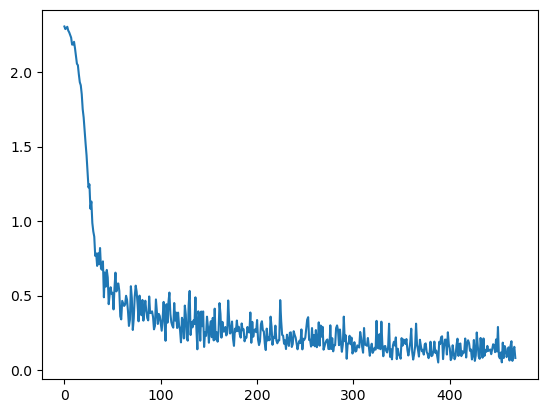

In [20]:
device = "cuda"
input_size = 784
num_classes = 10
learning_rate = 0.001
batch_size = 64
num_epochs = 1 

train_dataset = datasets.MNIST(root="./dataset", train=True, transform=transforms.ToTensor(), download=True)
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = datasets.MNIST(root="./dataset", train=False, transform=transforms.ToTensor(), download=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=True)



model = NN(input_size=input_size, num_classes=num_classes)
model = CNN(1, num_classes)

model.to(device)


criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
lossi = []

for epoch in range(num_epochs):
    
    for batch_idx, (data, targets) in enumerate(train_loader):
        data = data.to(device=device)
        targets = targets.to(device=device)
        
        #data = data.reshape(data.shape[0], -1) # 64, 1, 28, 28 -> (64, x) for FC 
        
        scores = model(data)
        loss = criterion(scores, targets)
        
        optimizer.zero_grad()
        loss.backward()
        lossi.append(loss.item())        
        optimizer.step()
        
plt.plot(torch.tensor(lossi).view(-1, 2).mean(1))       

In [17]:
def acc(loader, model):
    if loader.dataset.train:
        print("train")
    else:
        print("test")
        
    num_corr = 0
    num_samples = 0
    model.eval()
    
    with torch.no_grad():
        for batch_idx, (data, targets) in enumerate(loader):
            data = data.to(device=device)
            targets = targets.to(device=device)

            #data = data.reshape(data.shape[0], -1)

            scores = model(data)

            _, preds = scores.max(dim=1)
            num_corr += (preds==targets).sum().item()
            num_samples += preds.size(0)
            
    
    print(num_corr/num_samples * 100)
    
    model.train()
    
acc(train_loader, model)
acc(test_loader, model)

train
96.265
test
96.31
